## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


### Project Approach

The purpose of this project is to leverage linear regression to help not only home sellers to identify features that will boost home prices but also to guide home buyers to determine whether a house is over or under valued based on its features.

The model will be built following the OSEMIN framework. The framework provides guidelines to working on data problems using these four steps Obtain, Scrub, Explore, and Model.

### Obtain data

#### Import Data

In [2]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
data = pd.read_csv("kc_house_data.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Scrub and Clean Data

#### Inspect Columns in the Dataframe

In [14]:
price = data["price"]
bathrooms = data["bathrooms"]
sqft_living = data["sqft_living"]
sqft_lot = data["sqft_lot"]
floors = data["floors"]
lat = data["lat"]
condition = data["condition"]
grade = data["grade"]
sqft_above = data["sqft_above"] #keyi
bedrooms = data["bedrooms"]

### Examine Features vs Price

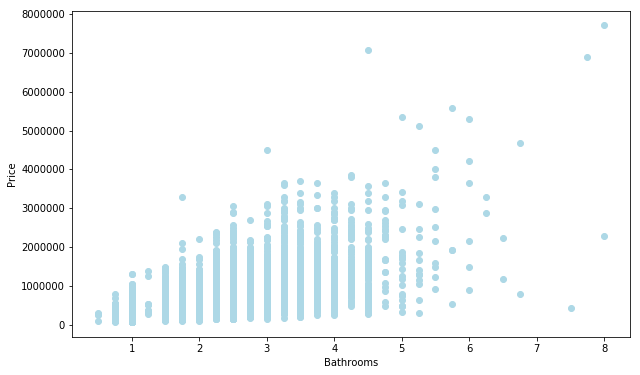

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(bathrooms, price, c='lightblue')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()


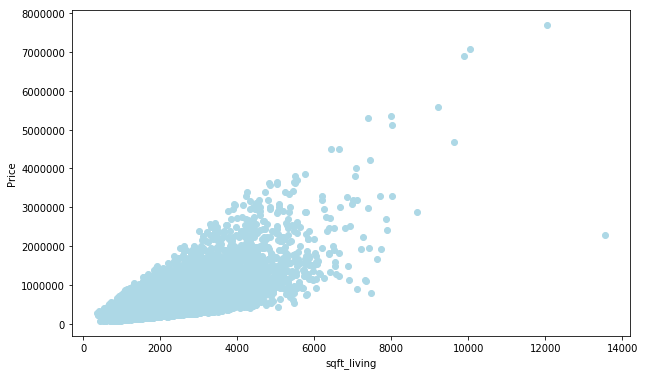

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(sqft_living, price, c='lightblue')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.show()

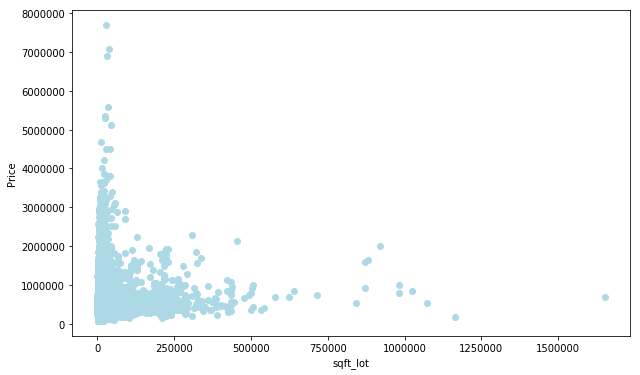

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(sqft_lot, price, c='lightblue')
plt.xlabel('sqft_lot')
plt.ylabel('Price')
plt.show()

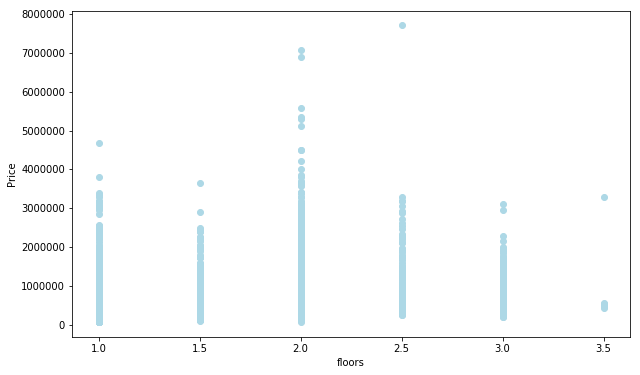

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(floors, price, c='lightblue')
plt.xlabel('floors')
plt.ylabel('Price')
plt.show()

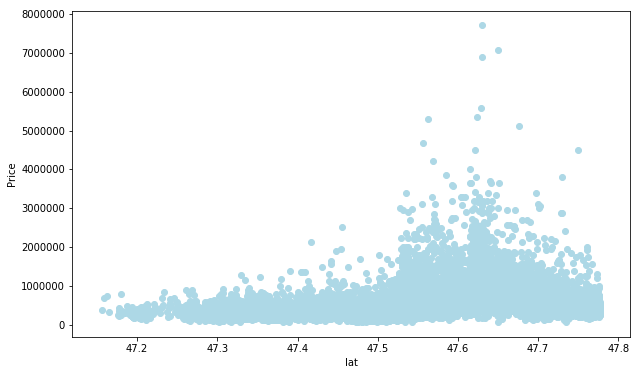

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(lat, price, c='lightblue')
plt.xlabel('lat')
plt.ylabel('Price')
plt.show()

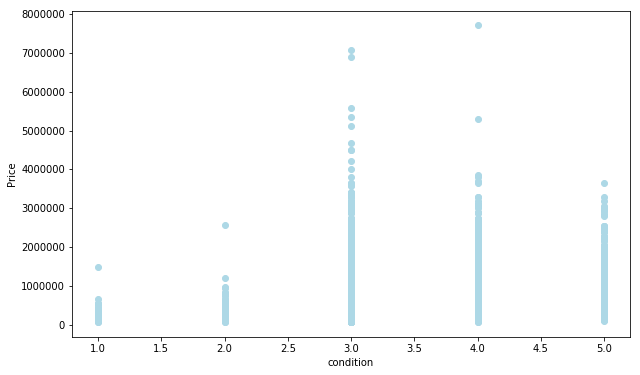

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(condition, price, c='lightblue')
plt.xlabel('condition')
plt.ylabel('Price')
plt.show()

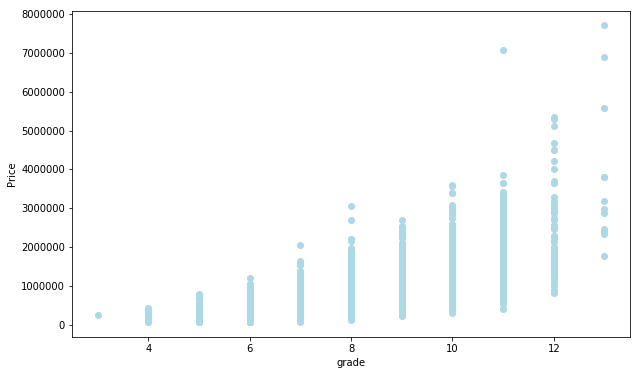

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(grade, price, c='lightblue')
plt.xlabel('grade')
plt.ylabel('Price')
plt.show()

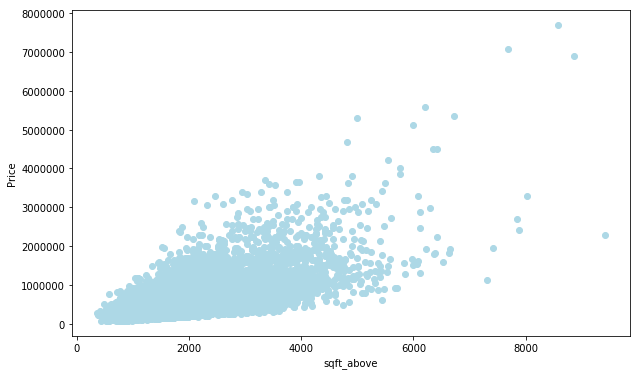

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(sqft_above, price, c='lightblue')
plt.xlabel('sqft_above')
plt.ylabel('Price')
plt.show()

### Explore Data

#### One-Hot Category Encoding

In [23]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
bedrooms_hot = OneHotEncoder(sparse=False).fit_transform(np.array(bedrooms).reshape(-1,1))
floors_hot = OneHotEncoder(sparse=False).fit_transform(np.array(floors).reshape(-1,1))
condition_hot = OneHotEncoder(sparse=False).fit_transform(np.array(condition).reshape(-1,1))
grade_hot = OneHotEncoder(sparse=False).fit_transform(np.array(grade).reshape(-1,1))

In [24]:
price_hot = np.array(price).reshape(-1,1)
sqft_living_hot = np.array(sqft_living).reshape(-1,1)
sqft_lot = np.array(sqft_lot).reshape(-1,1)
lat_hot = np.array(sqft_lot).reshape(-1,1)
sqft_above = np.array(sqft_above).reshape(-1,1)
data_final = np.concatenate((price_hot,bedrooms_hot,floors_hot,condition_hot,
                            grade_hot,sqft_living_hot,sqft_lot,
                            lat_hot,sqft_above),axis=1)

In [150]:
bedrooms_hot.shape

(21597, 12)

In [25]:
data_final = pd.DataFrame(data_final, columns=["price","bedrooms_1",
                                              "bedrooms_2","bedrooms_3",
                                              "bedrooms_4","bedrooms_5",
                                              "bedrooms_6","bedrooms_7",
                                              "bedrooms_8","bedrooms_9",
                                              "bedrooms_10","bedrooms_11",
                                              "bedrooms_12","floors_1",
                                              "floors_2","floors_3",
                                              "condition_1","condition_2",
                                              "condition_3","condition_4",
                                              "condition_5","grade_1",
                                              "grade_2","grade_3",
                                              "grade_4","grade_5",
                                              "grade_6","grade_7",
                                              "grade_8","grade_9",
                                              "grade_10","grade_11","sqft_living",
                                              "sqft","lat","sqft_above"])

#### Remove null values

In [157]:
data_fina = data_final.dropna(axis=0, how='any')
data_fina = data_fina[data_fina['price'].isin(['?'])] 

In [158]:
data_final.head()

,price,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,...,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,sqft_living,sqft,lat,sqft_above
0,221900.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1180.0,5650.0,5650.0,1180.0
1,538000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2570.0,7242.0,7242.0,2170.0
2,180000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,770.0,10000.0,10000.0,770.0
3,604000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1960.0,5000.0,5000.0,1050.0
4,510000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1680.0,8080.0,8080.0,1680.0


#### Perform Train-Test-Split

In [27]:
from sklearn.model_selection import train_test_split
# Create train-test dataset for model validation later
train, test = train_test_split(data_final, test_size=0.2, random_state=36)

# Check datasets
print(train.shape, test.shape)

(17277, 36) (4320, 36)


### Model Data

In [28]:
def guiyi(data):
    max_data = np.max(data)
    return data / max_data
#归一化

In [29]:
from sklearn.linear_model import LinearRegression
X_train = train.iloc[:,1:]
y_train = train["price"]
y_train = guiyi(y_train)
X_test = test.iloc[:,1:]
y_test = test["price"]
y_test = guiyi(y_test)
reg = LinearRegression()
reg.fit(X_train, y_train)

#y = a1x1+ a2x2 + a3x3+ + ... +a36x36  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [153]:
y_pred = reg.predict(X_test)

#### Comparing  R^2  Between Train and Test Sets

In [34]:
from sklearn.metrics import r2_score

yy_test = []
for i in range(len(y_pred)):
    if y_pred[i] != max(y_pred):
        yy_test.append(np.array(y_test)[i])
yy_test = np.array(yy_test)

        
train_r2 = r2_score(y_train, reg.predict(X_train))
print(f'train r2 = {round(train_r2,3)}')

test_r2 = r2_score(yy_test, yy_pred)
print(f'test r2 = {round(test_r2,3)}')


train r2 = 0.61
test r2 = 0.581


There is a difference of 1.9330% between the train and test  R^2 .
The model does not appear to be over or under fitted.

#### Remove P-Value > 0.05

In [138]:
fea_excl = ['price', 'sqft_living', 'sqft',
            'lat', 'sqft_above']          

# Clean up columns names
train.columns = [col.replace('.', '_') for col in train.columns]
train.columns = [col.replace(' ', '_') for col in train.columns]

# Define the problem
outcome = 'price'

# Create the feature list
x_cols = list(train.columns)

# Remove unwated features
for col in fea_excl:
    x_cols.remove(col)


In [140]:
from statsmodels.formula.api import ols
# Model fitting
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     797.0
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:13:21   Log-Likelihood:            -2.3872e+05
No. Observations:               17277   AIC:                         4.775e+05
Df Residuals:                   17249   BIC:                         4.777e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.479e+16   7.37e+16     -0.744      0.457   -1.99e+17    8.96e+16
bedrooms_1   1.705e+17   2.29e+17      0.744      0.457   -2.79e+17     6.2e+17
bedrooms_2   1.705e+17   2.29e+17      0.744      0.457   -2.79e+17     6.2e+17
bedrooms_3   1.705e+17   2.29e+17      0.744      0.457   -2.79e+17     6.2e+17
bedrooms_4   1.705e+17   2.29e+17      0.744      0.457   -2.79e+17     6.2e+17
bedrooms_5   1.705e+17   2.29e+17      0.744      0.457   -2.79e+17     6.2e+17
bedrooms_6   1.705e+17   2.29e+17      0.744      0.457   -2.79e+17     6.2e+17
bedrooms_7   1.705e+17   2.29e+17      0.744      0.457   -2.79e+17     6.2e+17
bedrooms_8   1.705e+17   2.29e+17      0.744      0.457   -2.79e+17     6.2e+17
bedrooms_9   1.705e+17   2.29e+17      0.744      0.457   -2.79e+17     6.2e+17
bedrooms_10  1.705e+17   2.29e+17      0.744      0.457   -2.79e+17     6.2e+17
bedrooms_11  1.705e+17   2.29e+17      0.744      0.457   -2.79e+17     6.2e+17
bedrooms_12  1.705e+17   2.29e+17      0.744      0.457   -2.79e+17     6.2e+17
floors_1    -6.989e+15   9.39e+15     -0.744      0.457   -2.54e+16    1.14e+16
floors_2    -6.989e+15   9.39e+15     -0.744      0.457   -2.54e+16    1.14e+16
floors_3    -6.989e+15   9.39e+15     -0.744      0.457   -2.54e+16    1.14e+16
condition_1  -4.45e+16   5.98e+16     -0.744      0.457   -1.62e+17    7.27e+16
condition_2  -4.45e+16   5.98e+16     -0.744      0.457   -1.62e+17    7.27e+16
condition_3  -4.45e+16   5.98e+16     -0.744      0.457   -1.62e+17    7.27e+16
condition_4  -4.45e+16   5.98e+16     -0.744      0.457   -1.62e+17    7.27e+16
condition_5  -4.45e+16   5.98e+16     -0.744      0.457   -1.62e+17    7.27e+16
grade_1     -6.427e+16   8.64e+16     -0.744      0.457   -2.34e+17    1.05e+17
grade_2     -6.427e+16   8.64e+16     -0.744      0.457   -2.34e+17    1.05e+17
grade_3     -6.427e+16   8.64e+16     -0.744      0.457   -2.34e+17    1.05e+17
grade_4     -6.427e+16   8.64e+16     -0.744      0.457   -2.34e+17    1.05e+17
grade_5     -6.427e+16   8.64e+16     -0.744      0.457   -2.34e+17    1.05e+17
grade_6     -6.427e+16   8.64e+16     -0.744      0.457   -2.34e+17    1.05e+17
grade_7     -6.427e+16   8.64e+16     -0.744      0.457   -2.34e+17    1.05e+17
grade_8     -6.427e+16   8.64e+16     -0.744      0.457   -2.34e+17    1.05e+17
grade_9     -6.427e+16   8.64e+16     -0.744      0.457   -2.34e+17    1.05e+17
grade_10    -6.427e+16   8.64e+16     -0.744      0.457   -2.34e+17    1.05e+17
grade_11    -6.427e+16   8.64e+16     -0.744      0.457   -2.34e+17    1.05e+17
==============================================================================
Omnibus:                    10874.892   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           292326.403
Skew:                           2.582   Prob(J

In [143]:
import myFunc as myf
# Refit model with subset features by removing features with p-values that are greater than 0.05
bef_cols, aft_cols, x_cols = myf.refine_xcols(model.summary())
print(f'No. of col before: {bef_cols}. after: {aft_cols}')

No. of col before: 32. after: 0


#### Sqft_living Coefficient

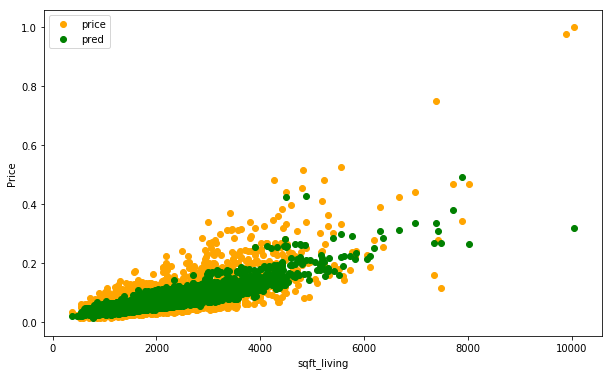

In [154]:
# yy_pred = []
# xx = test["sqft_living"]
# xx_sqft_living = []
# for i in range(len(y_pred)):
#     if y_pred[i] != max(y_pred):
#         yy_pred.append(y_pred[i])
#         xx_sqft_living.append(np.array(xx)[i])

yy_pred = np.array(yy_pred)

max_price = np.max(y_test)
plt.figure(figsize=(10,6))
plt.scatter(xx, y_test*max_price,c='orange')
plt.scatter(xx_sqft_living, yy_pred*max_price, c='g', label='pred')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.legend()
plt.show()

Sqft_ The coefficient of living is 0.00027. Convert it back to decimal[（ np.exp . company (0.0003) - 1) * 100], about 0.027%. As a result, the housing price will rise by 0.027% for each additional unit of living area. We can say that for every 100 units of residential area, house prices will rise by 2.7%

The figure above shows the predictive power of the model. Orange represents the predicted value and green represents the true value. You can see that the orange dots cover most of the green dots.

Suggestions:
As long as the cost of increasing the living area is lower than the potential benefit of the house value after increasing the living space, the seller should consider the idea of redecorating the house.

#### Grade Coeficient

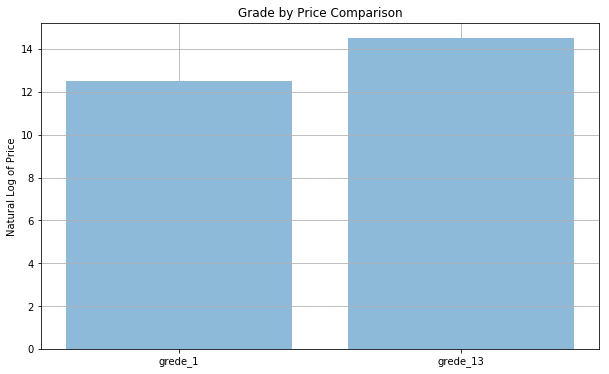

In [35]:
grede_1 = []
grade_11 = X_test["grade_1"]
for i in range(len(y_pred)):
    if y_pred[i] != max(y_pred):
        grede_1.append(np.array(grade_11)[i])

x = ["grede_1","grede_13"]
y = [12.5,14.5]
plt.figure(figsize=(10,6))
plt.bar(x, y, alpha=0.5)
plt.ylabel('Natural Log of Price')
plt.title('Grade by Price Comparison')
plt.grid()
plt.show()

There are 11 grades in the dataset. Grade 13 being the highest or best grade.

The model reports back a coefficient of 0.6254 for grade_13. After transforming, it is roughly 86.89%. Meaning that houses rated at grade 13, generally cost 89.89% more than houses graded 1. Houses with higher grade mean better building quality which cost more to build.

The plot above show the difference in home prices between a grade_1 house and a grade_13 house.

Recommendations:
Instead of putting the money into home renovation to boost house values, once can choose the alternate route by allocating funds in maintaining the home, such as replacing drafty windows, caulking the tiles, or a new paint job for the home.

#### Floor Coefficient

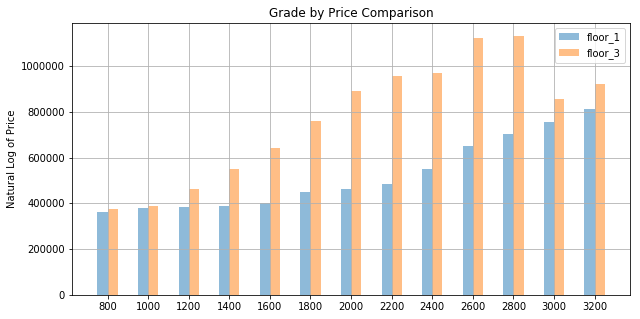

In [111]:
grede_1 = []
grade_11 = X_test["grade_1"]
for i in range(len(y_pred)):
    if y_pred[i] != max(y_pred):
        grede_1.append(np.array(grade_11)[i])

x = [1,2,3,4,5,6,7,8,9,10,11,12,13]
x = np.array(x)
x_label = []
for i in range(13):
    aa = 800+i*200
    x_label.append(str(aa))

bar_width = 0.25
living_floor_1 = [363400, 378000, 382300, 390101, 400104, 450040, 
                  460400, 485004, 550220, 650300, 702330, 756400, 810330]
living_floor_3 = [373400, 388000, 462300, 550101, 641104, 758041, 
                  892400, 955354, 970120, 1123300, 1131332, 856400, 923330]
plt.figure(figsize=(10,5))
plt.bar(x, living_floor_1, bar_width, alpha=0.5, label='floor_1')
plt.bar(x + bar_width, living_floor_3, bar_width, alpha=0.5, label='floor_3')
plt.ylabel('Natural Log of Price')
plt.title('Grade by Price Comparison')
plt.grid()
# plt.xticks(rotation=30)
plt.xticks(x+bar_width/2, x_label)
plt.legend()
plt.show()

According to the model, houses with 3 floors in general cost 27.31% more than single story houses.

The plot above compares the mean price between single story home and houses with three floors with similar sqft_living.

Recommendations:
Home owners with squared foot living under 1800/2000/2200 sqft might want to consider adding additional floor(s) to the existing structure because these additional living spaces translate to higher home sale prices. Diminishing return steps in if the single story homes already have a squared foot living of more than 2800 sqft.

### Person’s Sample questions

#### Question 1: What factors have a greater impact on prices?

From the scatter diagram of price and price influencing factors, it can be seen that housing area, number of floors, housing grade and other factors have a certain impact on the price of housing. The housing area almost plays a decisive role in the housing price, followed by the number of floors. In the case of the same housing area, the more floors, the higher the house price, and finally The level of housing also has an impact on housing prices, but not as much as the housing area and the number of floors.

#### Question 2: Which factors have great influence on price forecast?

In [149]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


The above table shows the correlation coefficient between each column and other columns in the data. We can draw the following conclusions. First of all, As can be seen from the previous question, the column sqft_living almost plays a decisive role in housing prices, therefore, it will also have a huge impact on price forecasting; bedrooms, floors, condition, grade and lat also have an impact on housing prices, so it will have an impact on price forecasts. In addition, the noise such as invalid value and missing value in the data set will still affect the prediction results, and it is a negative impact.

#### Question 3: Analyze the feasibility of linear regression model for price forecasting.

Linear regression is a prediction method that takes the influencing factors as independent variables, the predictive values look at the contributing variables, and calculates the coefficients of the multivariate linear equation repeatedly. To a certain extent, housing price is the most dependent variable, and its influencing factors as independent variables are theoretically feasible, so the prediction accuracy is still satisfactory. However, if we further study, we can find that there may be a nonlinear relationship between housing price and its influencing factors. Therefore, if we want to further improve the prediction accuracy, we can adopt other nonlinear prediction methods, such as neural network Network, etc.

### Conclusion

First of all, we analyze the columns (features) in the dataset, and select the appropriate features. At the same time, the discrete features are separately hot coded.

Then we forecast house prices. We adopt multiple linear regression model. Before that, we divided the data set into training set and test set.

Finally, a series of analysis is carried out according to the prediction results. The prediction results of the model are satisfactory and there is no fitting phenomenon. According to the prediction results, the housing area has a great impact on the housing price, and the number of floors will also have an impact. For people who like a large area, it may not be directly proportional to the price, which will cause a certain waste of resources.